In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

In [3]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state

In [4]:
model.find_ss(0.50,do_print=True)

ss.S = 7.44
ss.L = 56.28
ss.delta_L = 0.07
ss.v = 7.54
ss.m_v = 0.49
ss.r_K = 0.14
ss.r_ell = 1.68
ss.r_E = 1.00
ss.ell = 56.09
ss.w = 1.67
ss.K = 85.82
ss.I = 8.58
ss.Y = 159.42
ss.G = 39.85
ss.B_G = 0.00
ss.tau = 0.48
solving for household behavior: result.converged = True
ss.C = 51.74
ss.B = -55.83
ss.X = 143.09
ss.M = 136.98
par.phi = 0.974


**Household behavior:**

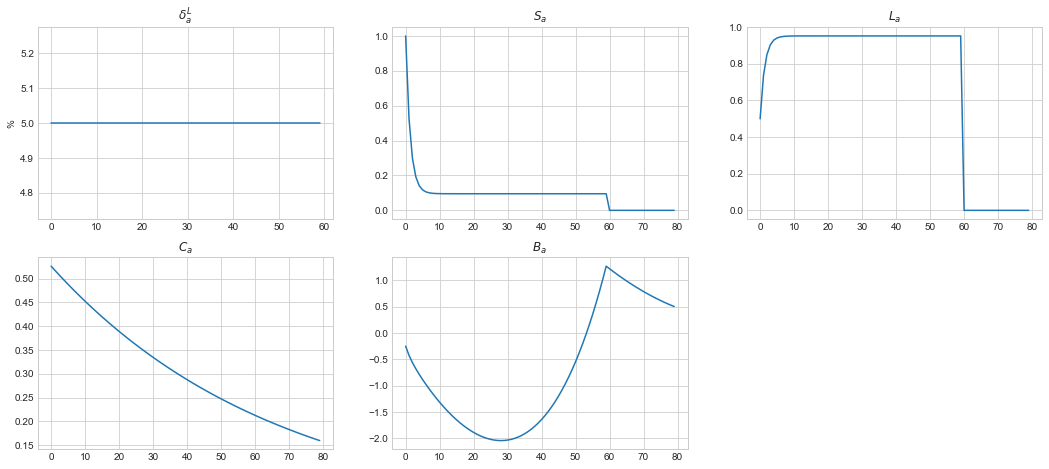

In [5]:
fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot(model.par.delta_L_a*100)
ax.set_ylabel('%')
ax.set_title('$\delta^L_a$')

ax = fig.add_subplot(3,3,2)
ax.plot(model.ss.S_a)
ax.set_title('$S_a$')

ax = fig.add_subplot(3,3,3)
ax.plot(model.ss.L_a)
ax.set_title('$L_a$')

ax = fig.add_subplot(3,3,4)
ax.plot(model.ss.C_a)
ax.set_ylabel('')
ax.set_title('$C_a$')

ax = fig.add_subplot(3,3,5)
ax.plot(model.ss.B_a)
ax.set_ylabel('')
ax.set_title('$B_a$');

# Speed and error tests

In [6]:
model.set_exo_ss()
model.set_unknowns_ss()

**Python evaluation:**

In [7]:
%time model.evaluate_blocks(py=True)

CPU times: user 5.7 s, sys: 119 ms, total: 5.82 s
Wall time: 6.22 s


**Check errors:**

In [8]:
errors = model.get_errors(do_print=True)

bargaining_cond     : abs. max = 2.22e-16
Bq_match            : abs. max = 3.99e-12
FOC_capital_agency  : abs. max = 5.55e-16
FOC_K_ell           : abs. max = 2.22e-16
FOC_E_Y_KL          : abs. max = 1.67e-16
mkt_clearing        : abs. max = 0.00e+00
output_price        : abs. max = 0.00e+00


**First numba evaluation:**

In [9]:
%time model.evaluate_blocks()

CPU times: user 1min 2s, sys: 1.51 s, total: 1min 4s
Wall time: 1min 10s


**Time:**

In [10]:
%timeit model.evaluate_blocks()
%timeit model.get_errors()

16.7 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
113 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%timeit model.evaluate_blocks(py=True)

The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached.
2.46 s ± 1.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Find an impulse-response

**Calculate Jacobian:**

In [12]:
model.calc_jac(do_print=True)

Jacobian calculated in 50.0 secs secs


Only needs to be calculated once.

**Set exogenous variables:**

In [23]:
model.set_exo_ss()

**Shock function:**

In [24]:
Tshock = 20
shock = 0.01*ss.P_E
persistence = 0.75**np.arange(Tshock)
sol.P_E[:Tshock] = ss.P_E + shock*persistence

Check errors when guessing at steady state -> excess demand

In [25]:
model.set_unknowns_ss()
model.evaluate_blocks()
errors = model.get_errors(do_print=True)

bargaining_cond     : abs. max = 2.66e-04
Bq_match            : abs. max = 3.01e-02
FOC_capital_agency  : abs. max = 5.55e-16
FOC_K_ell           : abs. max = 2.22e-16
FOC_E_Y_KL          : abs. max = 0.00e+00
mkt_clearing        : abs. max = 2.51e-02
output_price        : abs. max = 0.00e+00


**Find IRF:**

In [26]:
model.find_IRF()

initial:
   max. abs. error = 3.01e-02
    2.66e-04 in bargaining_cond
    3.01e-02 in Bq_match
    5.55e-16 in FOC_capital_agency
    2.22e-16 in FOC_K_ell
    0.00e+00 in FOC_E_Y_KL
    2.51e-02 in mkt_clearing
    0.00e+00 in output_price

it = 0
 solve: t1-t0 = 1.2 secs
   max. abs. error = 3.01e-02
    8.31e-07 in bargaining_cond
    1.07e-04 in Bq_match
    3.90e-07 in FOC_capital_agency
    1.94e-07 in FOC_K_ell
    1.08e-07 in FOC_E_Y_KL
    1.25e-05 in mkt_clearing
    1.60e-07 in output_price
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 1
 solve: t1-t0 = 1.1 secs
   max. abs. error = 1.07e-04
    3.76e-09 in bargaining_cond
    3.15e-07 in Bq_match
    2.92e-09 in FOC_capital_agency
    2.80e-09 in FOC_K_ell
    1.08e-09 in FOC_E_Y_KL
    1.23e-07 in mkt_clearing
    1.82e-09 in output_price
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 2
 solve: t1-t0 = 2.1 secs
   max. abs. error = 3.15e-07
    2.94e-11 in bargaining_cond
    1.70e-09 in

**Plot:**

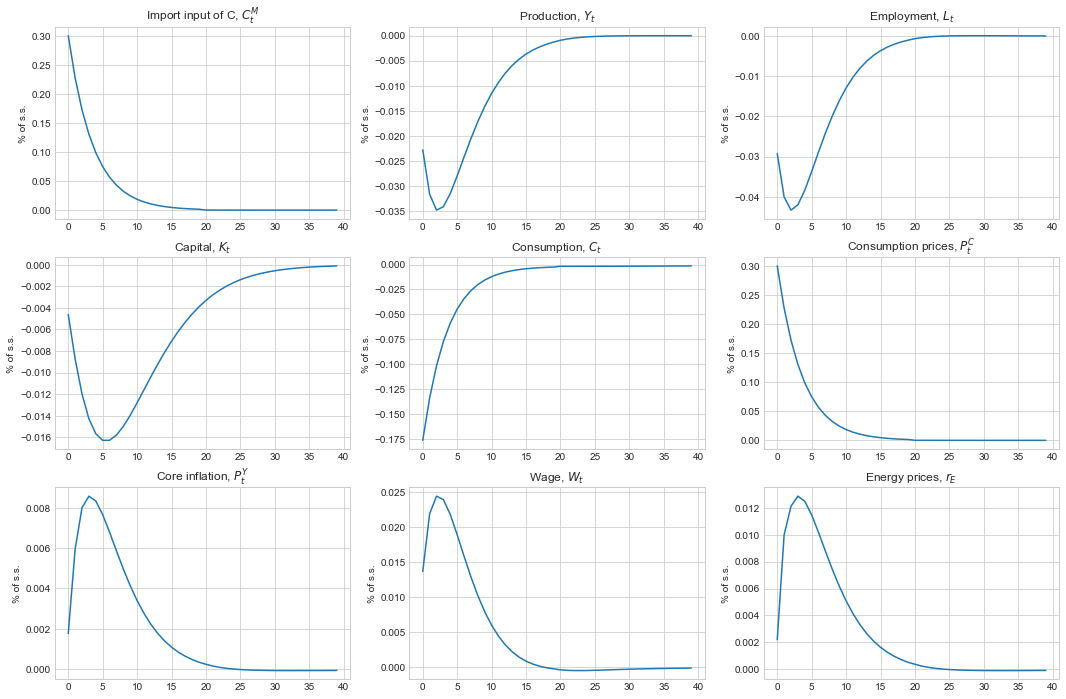

In [27]:
T_IRF = 40

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((sol.P_C[:T_IRF]/ss.P_C-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Import input of C, $C^M_t$')

ax = fig.add_subplot(3,3,2)
ax.plot((sol.Y[:T_IRF]/ss.Y-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Production, $Y_t$')

ax = fig.add_subplot(3,3,3)
ax.plot((sol.L[:T_IRF]/ss.L-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Employment, $L_t$')

ax = fig.add_subplot(3,3,4)
ax.plot((sol.K[:T_IRF]/ss.K-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Capital, $K_t$')

ax = fig.add_subplot(3,3,5)
ax.plot((sol.C[:T_IRF]/ss.C-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption, $C_t$')

ax = fig.add_subplot(3,3,6)
ax.plot(((sol.P_C[:T_IRF])/(ss.P_C)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption prices, $P^C_t$');

ax = fig.add_subplot(3,3,7)
ax.plot(((sol.P_Y[:T_IRF])/(ss.P_Y)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Core inflation, $P^{Y}_t$');

ax = fig.add_subplot(3,3,8)
ax.plot(((sol.w[:T_IRF])/(ss.w)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Wage, $W_t$');

ax = fig.add_subplot(3,3,9)
ax.plot(((sol.P_Y_KL[:T_IRF])/(ss.P_Y_KL)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Energy prices, $r_E$');